In [542]:
#import all libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_classification

In [543]:
#Team 1,Team 2,Ground,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
win_pred = [[1,0, 24, 0, 1, 1, 0 ]]
Team1 = 'India'
Team2 = 'Australia'

In [544]:
#load data 
cricket_raw_df = pd.read_csv('datasets/archive/ContinousDataset.csv')
N=3000
#cricket_raw_df.drop(index=cricket_raw_df.index[:N], axis=0, inplace=True)
cricket_raw_df.shape

(7494, 13)

In [545]:
cricket_raw_df

,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First
1,1,ODI # 2,England,Australia,Winner2ndInning,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First
2,2,ODI # 3,England,Australia,Winner2ndInning,Lord's,"Aug 26, 1972",Australia,England,Home,Away,First,Second
3,3,ODI # 4,England,Australia,Winner2ndInning,Birmingham,"Aug 28, 1972",England,England,Home,Away,Second,First
4,4,ODI # 5,New Zealand,Pakistan,Winner1stInning,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,Home,Away,First,Second
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7489,3747,ODI # 3931,New Zealand,India,Winner2ndInning,Pune,"Oct 25, 2017",India,India,Away,Home,First,Second
7490,3748,ODI # 3932,New Zealand,India,Winner1stInning,Kanpur,"Oct 29, 2017",India,India,Away,Home,Second,First
7491,3749,ODI # 3933,Namibia,Hong Kong,Winner2ndInning,Mumbai,"Aug 12, 2017",Namibia,India,Neutral,Neutral,Second,First
7492,3750,ODI # 3934,U.S.A.,Bermuda,Winner2ndInning,Mumbai,"Aug 12, 2017",U.S.A.,India,Neutral,Neutral,Second,First


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7494 entries, 0 to 7493
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     7494 non-null   int64 
 1   Scorecard      7494 non-null   object
 2   Team 1         7494 non-null   object
 3   Team 2         7494 non-null   object
 4   Margin         7494 non-null   object
 5   Ground         7494 non-null   object
 6   Match Date     7494 non-null   object
 7   Winner         7494 non-null   object
 8   Host_Country   7364 non-null   object
 9   Venue_Team1    7494 non-null   object
 10  Venue_Team2    7494 non-null   object
 11  Innings_Team1  7494 non-null   object
 12  Innings_Team2  7494 non-null   object
dtypes: int64(1), object(12)
memory usage: 761.2+ KB


<AxesSubplot:>

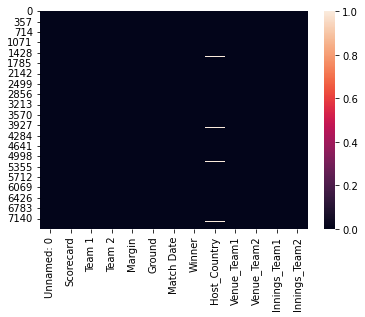

In [546]:
cricket_raw_df.info()
sns.heatmap(cricket_raw_df.isnull())

#Show info and null values
cricket_raw_df.info()
sns.heatmap(cricket_raw_df.isnull())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7364 entries, 0 to 7493
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     7364 non-null   int64 
 1   Scorecard      7364 non-null   object
 2   Team 1         7364 non-null   object
 3   Team 2         7364 non-null   object
 4   Margin         7364 non-null   object
 5   Ground         7364 non-null   object
 6   Match Date     7364 non-null   object
 7   Winner         7364 non-null   object
 8   Host_Country   7364 non-null   object
 9   Venue_Team1    7364 non-null   object
 10  Venue_Team2    7364 non-null   object
 11  Innings_Team1  7364 non-null   object
 12  Innings_Team2  7364 non-null   object
dtypes: int64(1), object(12)
memory usage: 805.4+ KB


<AxesSubplot:>

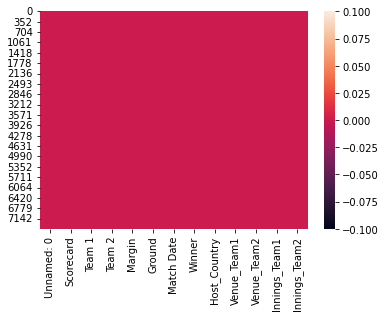

In [547]:
#Drop null values and show info
cricket_raw_df = cricket_raw_df.dropna()
cricket_raw_df.info()
sns.heatmap(cricket_raw_df.isnull())

In [548]:
cricket_raw_df.describe()

,Unnamed: 0
count,7364.000000
mean,1870.095872
std,1084.030136
min,0.000000
25%,926.000000
50%,1875.500000
75%,2804.000000
max,3750.000000


In [549]:
#no. of rows and columns
cricket_raw_df.shape

(7364, 13)

In [550]:
selected_columns = [
                     'Team 1',
                     'Team 2',
                     'Ground',
                     'Winner',
                     'Venue_Team1',
                     'Venue_Team2',
                    'Innings_Team1',
                     'Innings_Team2']

In [551]:
#selecting useful columns from raw data, drop date, margin, scorecard
cricket_df = cricket_raw_df[selected_columns].copy()

In [552]:
cricket_df
#Insert T1_Win column where team1 wins
win = np.where(cricket_df['Winner'] == cricket_df['Team 1'], 1, 0)
#cricket_df.insert(loc=0, column='T1_Win', value= win)

cricket_df = cricket_df[["Winner", "Team 1", "Team 2", "Ground", "Venue_Team1", "Venue_Team2", "Innings_Team1", "Innings_Team2"]]
cricket_df = cricket_df[((cricket_df['Team 1'] == Team1) & (cricket_df['Team 2'] == Team2)) | ((cricket_df['Team 1'] == Team2) & (cricket_df['Team 2'] == Team1))]

cricket_df

,Winner,Team 1,Team 2,Ground,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
91,India,Australia,India,Melbourne,Home,Away,Second,First
94,Australia,Australia,India,Sydney,Home,Away,Second,First
98,Australia,Australia,India,Sydney,Home,Away,Second,First
100,Australia,Australia,India,Melbourne,Home,Away,Second,First
102,Australia,Australia,India,Sydney,Home,Away,First,Second
...,...,...,...,...,...,...,...,...
7469,India,Australia,India,Chennai,Away,Home,Second,First
7471,India,Australia,India,Kolkata,Away,Home,Second,First
7472,India,Australia,India,Indore,Away,Home,First,Second
7475,Australia,Australia,India,Bengaluru,Away,Home,First,Second


In [553]:
cricket_df.dtypes

Winner           object
Team 1           object
Team 2           object
Ground           object
Venue_Team1      object
Venue_Team2      object
Innings_Team1    object
Innings_Team2    object
dtype: object

In [554]:
x1=cricket_df['Team 1'].unique()
x2=cricket_df['Team 2'].unique()
x3=cricket_df['Ground'].unique()
x4=cricket_df['Venue_Team1'].unique()
x5=cricket_df['Venue_Team2'].unique()
x6=cricket_df['Innings_Team1'].unique()
x7=cricket_df['Innings_Team2'].unique()
cricket_df


,Winner,Team 1,Team 2,Ground,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
91,India,Australia,India,Melbourne,Home,Away,Second,First
94,Australia,Australia,India,Sydney,Home,Away,Second,First
98,Australia,Australia,India,Sydney,Home,Away,Second,First
100,Australia,Australia,India,Melbourne,Home,Away,Second,First
102,Australia,Australia,India,Sydney,Home,Away,First,Second
...,...,...,...,...,...,...,...,...
7469,India,Australia,India,Chennai,Away,Home,Second,First
7471,India,Australia,India,Kolkata,Away,Home,Second,First
7472,India,Australia,India,Indore,Away,Home,First,Second
7475,Australia,Australia,India,Bengaluru,Away,Home,First,Second


In [555]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
#Encode all columns
#cricket_df.iloc[:, 0]= labelencoder.fit_transform(cricket_df.iloc[:, 0].values)
cricket_df.iloc[:, 1]= labelencoder.fit_transform(cricket_df.iloc[:, 1].values)
cricket_df.iloc[:, 2]= labelencoder.fit_transform(cricket_df.iloc[:, 2].values)
cricket_df.iloc[:, 3]= labelencoder.fit_transform(cricket_df.iloc[:, 3].values)
cricket_df.iloc[:, 4]= labelencoder.fit_transform(cricket_df.iloc[:, 4].values)
cricket_df.iloc[:, 5]= labelencoder.fit_transform(cricket_df.iloc[:, 5].values)
cricket_df.iloc[:, 6]= labelencoder.fit_transform(cricket_df.iloc[:, 6].values)
cricket_df.iloc[:, 7]= labelencoder.fit_transform(cricket_df.iloc[:, 7].values)


In [556]:
cricket_df

,Winner,Team 1,Team 2,Ground,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
91,India,0,1,28,1,0,1,0
94,Australia,0,1,38,1,0,1,0
98,Australia,0,1,38,1,0,1,0
100,Australia,0,1,28,1,0,1,0
102,Australia,0,1,38,1,0,0,1
...,...,...,...,...,...,...,...,...
7469,India,0,1,8,0,1,1,0
7471,India,0,1,25,0,1,1,0
7472,India,0,1,20,0,1,0,1
7475,Australia,0,1,2,0,1,0,1


In [557]:
cricket_df.dtypes

Winner           object
Team 1            int32
Team 2            int32
Ground            int32
Venue_Team1       int32
Venue_Team2       int32
Innings_Team1     int32
Innings_Team2     int32
dtype: object

In [558]:
cricket_df = cricket_df[["Winner", "Team 1", "Team 2", "Ground", "Venue_Team1", "Venue_Team2", "Innings_Team1", "Innings_Team2"]]

In [559]:
cricket_df.dtypes

Winner           object
Team 1            int32
Team 2            int32
Ground            int32
Venue_Team1       int32
Venue_Team2       int32
Innings_Team1     int32
Innings_Team2     int32
dtype: object

In [560]:
cricket_df.head()

,Winner,Team 1,Team 2,Ground,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
91,India,0,1,28,1,0,1,0
94,Australia,0,1,38,1,0,1,0
98,Australia,0,1,38,1,0,1,0
100,Australia,0,1,28,1,0,1,0
102,Australia,0,1,38,1,0,0,1


In [561]:
#Split data into X and Y variables
X = cricket_df.iloc[:, 1:8].values
Y = cricket_df.iloc[:, 0].values

In [562]:
from sklearn.model_selection import train_test_split
# Separate train and test sets
#Split the dataset into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [563]:
#Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [564]:
rf = RandomForestClassifier(n_estimators=100, max_depth=20,
                              random_state=0)
rf.fit(X_train, Y_train) 


scorerf = rf.score(X_train, Y_train)
scorerf2 = rf.score(X_test, Y_test)


print("Training set accuracy: ", '%.3f'%(scorerf))
print("Test set accuracy: ", '%.3f'%(scorerf2))

Training set accuracy:  0.844
Test set accuracy:  0.587


In [565]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, Y_train)

scoredt = dt_clf.score(X_train, Y_train)
scoredt2 = dt_clf.score(X_test, Y_test)


print("Training set accuracy: ", '%.3f'%(scoredt))
print("Test set accuracy: ", '%.3f'%(scoredt2))

Training set accuracy:  0.667
Test set accuracy:  0.522


In [566]:
gb_clf = ensemble.GradientBoostingClassifier()
gb_clf.fit(X_train,Y_train)

scoregb = gb_clf.score(X_train, Y_train)
scoregb2 = gb_clf.score(X_test, Y_test)


print("Training set accuracy: ", '%.3f'%(scoregb))
print("Test set accuracy: ", '%.3f'%(scoregb2))

Training set accuracy:  0.828
Test set accuracy:  0.652


In [567]:
from sklearn.naive_bayes import GaussianNB
nb_clf= GaussianNB()
nb_clf.fit(X_train,Y_train)

scorenb = nb_clf.score(X_train, Y_train)
scorenb2 = nb_clf.score(X_test, Y_test)


print("Training set accuracy: ", '%.3f'%(scorenb))
print("Test set accuracy: ", '%.3f'%(scorenb2))

Training set accuracy:  0.617
Test set accuracy:  0.500


In [568]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf= KNeighborsClassifier()
knn_clf.fit(X_train,Y_train)

scoreknn = knn_clf.score(X_train, Y_train)
scoreknn2 = knn_clf.score(X_test, Y_test)


print("Training set accuracy: ", '%.3f'%(scoreknn))
print("Test set accuracy: ", '%.3f'%(scoreknn2))

Training set accuracy:  0.706
Test set accuracy:  0.500


In [569]:
from sklearn.linear_model import LogisticRegression
lr_clf= LogisticRegression(random_state =0)
lr_clf.fit(X_train,Y_train)

scorelr = lr_clf.score(X_train, Y_train)
scorelr2 = lr_clf.score(X_test, Y_test)


print("Training set accuracy: ", '%.3f'%(scorelr))
print("Test set accuracy: ", '%.3f'%(scorelr2))

Training set accuracy:  0.594
Test set accuracy:  0.500


In [570]:
from sklearn.svm import SVC
sv_clf= SVC(probability=True, kernel='linear')
sv_clf.fit(X_train,Y_train)

scoresv = sv_clf.score(X_train, Y_train)
scoresv2 = sv_clf.score(X_test, Y_test)


print("Training set accuracy: ", '%.3f'%(scoresv))
print("Test set accuracy: ", '%.3f'%(scoresv2))

Training set accuracy:  0.594
Test set accuracy:  0.674


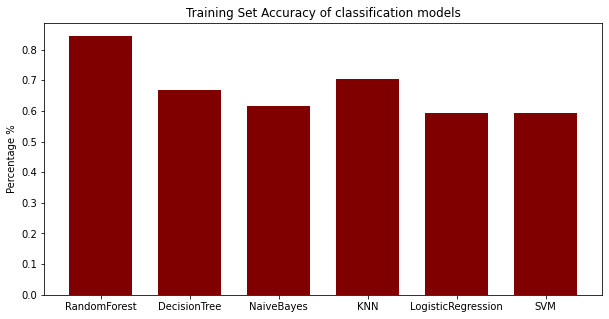

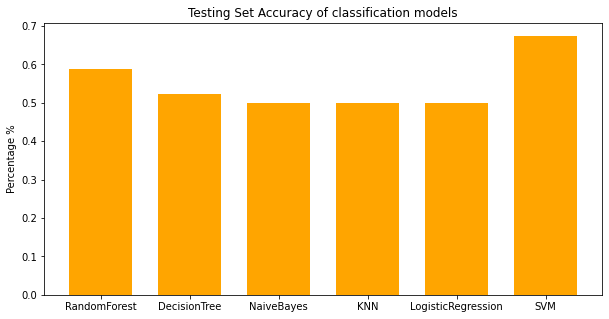

In [571]:
data = {'RandomForest':scorerf, 'DecisionTree':scoredt, 
        'NaiveBayes':scorenb, 'KNN':scoreknn,'LogisticRegression':scorelr,'SVM':scoresv}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.7)
 
plt.ylabel("Percentage %")
plt.title("Training Set Accuracy of classification models")
plt.show()


data = {'RandomForest':scorerf2, 'DecisionTree':scoredt2, 
        'NaiveBayes':scorenb2, 'KNN':scoreknn2,'LogisticRegression':scorelr2,'SVM':scoresv2}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='orange',
        width = 0.7)
 
plt.ylabel("Percentage %")
plt.title("Testing Set Accuracy of classification models")
plt.show()

In [572]:
#Create a function, using many machine learning models
def models(X_train, Y_train):
    
    #
    from sklearn.linear_model import LogisticRegression
    log= LogisticRegression()
    log.fit(X_train, Y_train)
    
    #
    from sklearn.neighbors import KNeighborsClassifier
    knn= KNeighborsClassifier()
    knn.fit(X_train, Y_train)
    
    #
    from sklearn.svm import SVC
    svc_lin= SVC(kernel='linear')
    svc_lin.fit(X_train, Y_train)
    
    #
    from sklearn.svm import SVC
    svc_rbf= SVC(kernel='rbf')
    svc_rbf.fit(X_train, Y_train)
    
    #
    from sklearn.naive_bayes import GaussianNB
    gauss= GaussianNB()
    gauss.fit(X_train, Y_train)
    
    from sklearn import ensemble
    gb_clf= ensemble.GradientBoostingClassifier()
    gb_clf.fit(X_train,Y_train)

    
     #
    from sklearn.tree import DecisionTreeClassifier
    tree= DecisionTreeClassifier(criterion='entropy', random_state = 0)
    tree.fit(X_train, Y_train)
    
    from sklearn.ensemble import RandomForestClassifier
    forest= RandomForestClassifier(n_estimators = 100, criterion='entropy', random_state = 0)
    forest.fit(X_train, Y_train)
    
    #Print training accuracy
    print('[0] Logistic Regression Training Accuracy: ', log.score(X_train, Y_train))
    print('[1] K Neighbors Training Accuracy: ', knn.score(X_train, Y_train))
    print('[2] SVC Linear Training Accuracy: ', svc_lin.score(X_train, Y_train))
    print('[3] SVC RBF Training Accuracy: ', svc_rbf.score(X_train, Y_train))
    print('[4] GaussianNB Training Accuracy: ', gauss.score(X_train, Y_train))
    print('[5] Decision Tree Training Accuracy: ', tree.score(X_train, Y_train))
    print('[6] Random Forest Training Accuracy: ', forest.score(X_train, Y_train))
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [573]:
#Get and train all the models 
model = models(X_train, Y_train)

[0] Logistic Regression Training Accuracy:  0.5944444444444444
[1] K Neighbors Training Accuracy:  0.7055555555555556
[2] SVC Linear Training Accuracy:  0.5944444444444444
[3] SVC RBF Training Accuracy:  0.6777777777777778
[4] GaussianNB Training Accuracy:  0.6166666666666667
[5] Decision Tree Training Accuracy:  0.8444444444444444
[6] Random Forest Training Accuracy:  0.8444444444444444


In [574]:
#Show the confusion metrix and accuracy for all the models on test data
from sklearn.metrics import confusion_matrix

for i in range( len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    
#Extract TN, FP, FN, FP
    TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()

    
    test_score = (TP + TN) / (TP + TN + FN + FP)
    
    print(cm)
    print('Model[{}] Testing Accuracy = "{}"'.format(i, test_score))
    print()

[[22  9]
 [14  1]]
Model[0] Testing Accuracy = "0.5"

[[18 13]
 [10  5]]
Model[1] Testing Accuracy = "0.5"

[[31  0]
 [15  0]]
Model[2] Testing Accuracy = "0.6739130434782609"

[[23  8]
 [11  4]]
Model[3] Testing Accuracy = "0.5869565217391305"

[[22  9]
 [14  1]]
Model[4] Testing Accuracy = "0.5"

[[21 10]
 [ 8  7]]
Model[5] Testing Accuracy = "0.6086956521739131"

[[20 11]
 [ 8  7]]
Model[6] Testing Accuracy = "0.5869565217391305"



In [575]:
pred = model[2].predict(X_test)
print(pred)

print()

print(Y_test)

['Australia' 'Australia' 'Australia' 'Australia' 'Australia' 'Australia'
 'Australia' 'Australia' 'Australia' 'Australia' 'Australia' 'Australia'
 'Australia' 'Australia' 'Australia' 'Australia' 'Australia' 'Australia'
 'Australia' 'Australia' 'Australia' 'Australia' 'Australia' 'Australia'
 'Australia' 'Australia' 'Australia' 'Australia' 'Australia' 'Australia'
 'Australia' 'Australia' 'Australia' 'Australia' 'Australia' 'Australia'
 'Australia' 'Australia' 'Australia' 'Australia' 'Australia' 'Australia'
 'Australia' 'Australia' 'Australia' 'Australia']

['India' 'Australia' 'Australia' 'India' 'Australia' 'Australia' 'India'
 'Australia' 'Australia' 'Australia' 'Australia' 'India' 'India' 'India'
 'Australia' 'Australia' 'Australia' 'Australia' 'Australia' 'Australia'
 'Australia' 'India' 'Australia' 'Australia' 'Australia' 'Australia'
 'India' 'India' 'India' 'Australia' 'Australia' 'Australia' 'Australia'
 'India' 'India' 'Australia' 'Australia' 'Australia' 'Australia'
 'Australia'

In [576]:
y1=cricket_df['Team 1'].unique()
y2=cricket_df['Team 2'].unique()
y3=cricket_df['Ground'].unique()
y4=cricket_df['Venue_Team1'].unique()
y5=cricket_df['Venue_Team2'].unique()
y6=cricket_df['Innings_Team1'].unique()
y7=cricket_df['Innings_Team2'].unique()
team= pd.DataFrame({'Team1 ' : x1, 'Numeric' : y1, 'Team 2 ' : x2, 'Numeric2' : y2})
ground= pd.DataFrame({'Ground': x3, 'Numeric3' : y3})
venue= pd.DataFrame({'VenueTeam1 ' : x4, 'Numeric4' : y4, 'VenueTeam2 ' : x5, 'Numeric5' : y5}) 
inning= pd.DataFrame({'InningsTeam1 ' : x6, 'Numeric6' : y6, 'InningsTeam2 ' : x7, 'Numeric7' : y7})
team, ground, venue, inning

(      Team1   Numeric    Team 2   Numeric2
 0  Australia        0      India         1
 1      India        1  Australia         0,
            Ground  Numeric3
 0       Melbourne        28
 1          Sydney        38
 2      Nottingham        32
 3      Chelmsford         7
 4       Ahmedabad         1
 5          Indore        20
 6         Sharjah        36
 7        Brisbane         3
 8        Adelaide         0
 9          Jaipur        21
 10       Srinagar        37
 11          Delhi        11
 12         Rajkot        35
 13        Chennai         8
 14      Bengaluru         2
 15   Christchurch         9
 16       Hamilton        17
 17          Perth        33
 18         Hobart        18
 19        Colombo        10
 20        Dunedin        13
 21         Mumbai        29
 22          Kochi        24
 23         Kanpur        23
 24          Dhaka        12
 25       The Oval        39
 26          Galle        14
 27        Nairobi        31
 28           Pune        

In [577]:
#Team 1,Team 2,Ground,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2

#Scale win_pred
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
win_pred_scaled = sc.fit_transform(win_pred)

#Print win prediction using random forest classifier
pred = model[2].predict(win_pred_scaled)
print(pred)

['Australia']
